In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # визуализация данных
import numpy as np
%matplotlib inline

In [2]:
import os
lst = os.listdir('./extracted_data')

lst_data = []
for file in lst:
    lst_data.append(pd.read_csv('./extracted_data/' + file))

In [3]:
all_data = pd.concat(lst_data, ignore_index=True)
all_data

,section_count_ratio,section_count_ratio_str,max_angle,max_section,average_section,square,time,condition
0,0.230769,6 / 26,14.796762,170.229257,55.569122,3.855342,441.9900,0
1,0.103448,3 / 29,34.777831,331.102703,131.500262,9.986951,351.1691,0
2,0.294118,10 / 34,85.601295,239.549577,51.479655,45.364941,727.2778,0
3,0.222222,8 / 36,28.909184,193.000000,52.014910,36.404742,670.1199,0
4,0.052632,2 / 38,13.558428,505.830999,256.077777,1.479150,458.3306,0
...,...,...,...,...,...,...,...,...
8076,0.137931,4 / 29,15.531183,424.603344,159.557616,32.358965,360.9790,0
8077,0.235294,4 / 17,281.309932,143.610585,47.188224,15.561553,589.5745,0
8078,0.166667,2 / 12,39.815236,126.063476,69.052535,4.974326,679.1769,0
8079,0.204545,9 / 44,206.980231,343.908418,87.261933,157.301882,645.8964,0


In [5]:
print(all_data.section_count_ratio_str.value_counts())  

2 / 2       592
1 / 2       365
2 / 3       128
3 / 3       118
1 / 3       107
           ... 
22 / 126      1
13 / 152      1
18 / 98       1
14 / 25       1
10 / 83       1
Name: section_count_ratio_str, Length: 1441, dtype: int64


In [162]:
tired_state = len(all_data[all_data.condition == 0]) 
awake_state = len(all_data[all_data.condition == 1]) 
n_samples = tired_state if tired_state < awake_state else awake_state
n_samples

2491

In [163]:
from sklearn.utils import resample
sampled_0 = resample(all_data[all_data.iloc[:, -1] == 0], replace = False, n_samples = n_samples, random_state=39)
sampled_1 = resample(all_data[all_data.iloc[:, -1] == 1], replace = False, n_samples = n_samples, random_state=39)

all_data = pd.concat([sampled_0, sampled_1])

In [164]:
len(all_data[all_data.condition == 0])

2491

In [165]:
len(all_data[all_data.condition == 1])

2491

In [166]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 6068 to 602
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   section_count_ratio  4982 non-null   float64
 1   max_angle            4982 non-null   float64
 2   max_section          4982 non-null   float64
 3   average_section      4982 non-null   float64
 4   square               4982 non-null   float64
 5   time                 4982 non-null   float64
 6   condition            4982 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 311.4 KB


In [167]:
Dup_Rows = all_data[all_data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   section_count_ratio  0 non-null      float64
 1   max_angle            0 non-null      float64
 2   max_section          0 non-null      float64
 3   average_section      0 non-null      float64
 4   square               0 non-null      float64
 5   time                 0 non-null      float64
 6   condition            0 non-null      int64  
dtypes: float64(6), int64(1)
memory usage: 0.0 bytes


In [168]:
all_data.drop_duplicates(keep='first', inplace = True)

In [169]:
def print_hist_boxplot_heatmap(data):
    data.hist(figsize = (25, 25), grid = True)
    for el in data:
        sns.boxplot(x=data[el])
        plt.show()
    plt.figure(figsize=(10, 6))
    sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

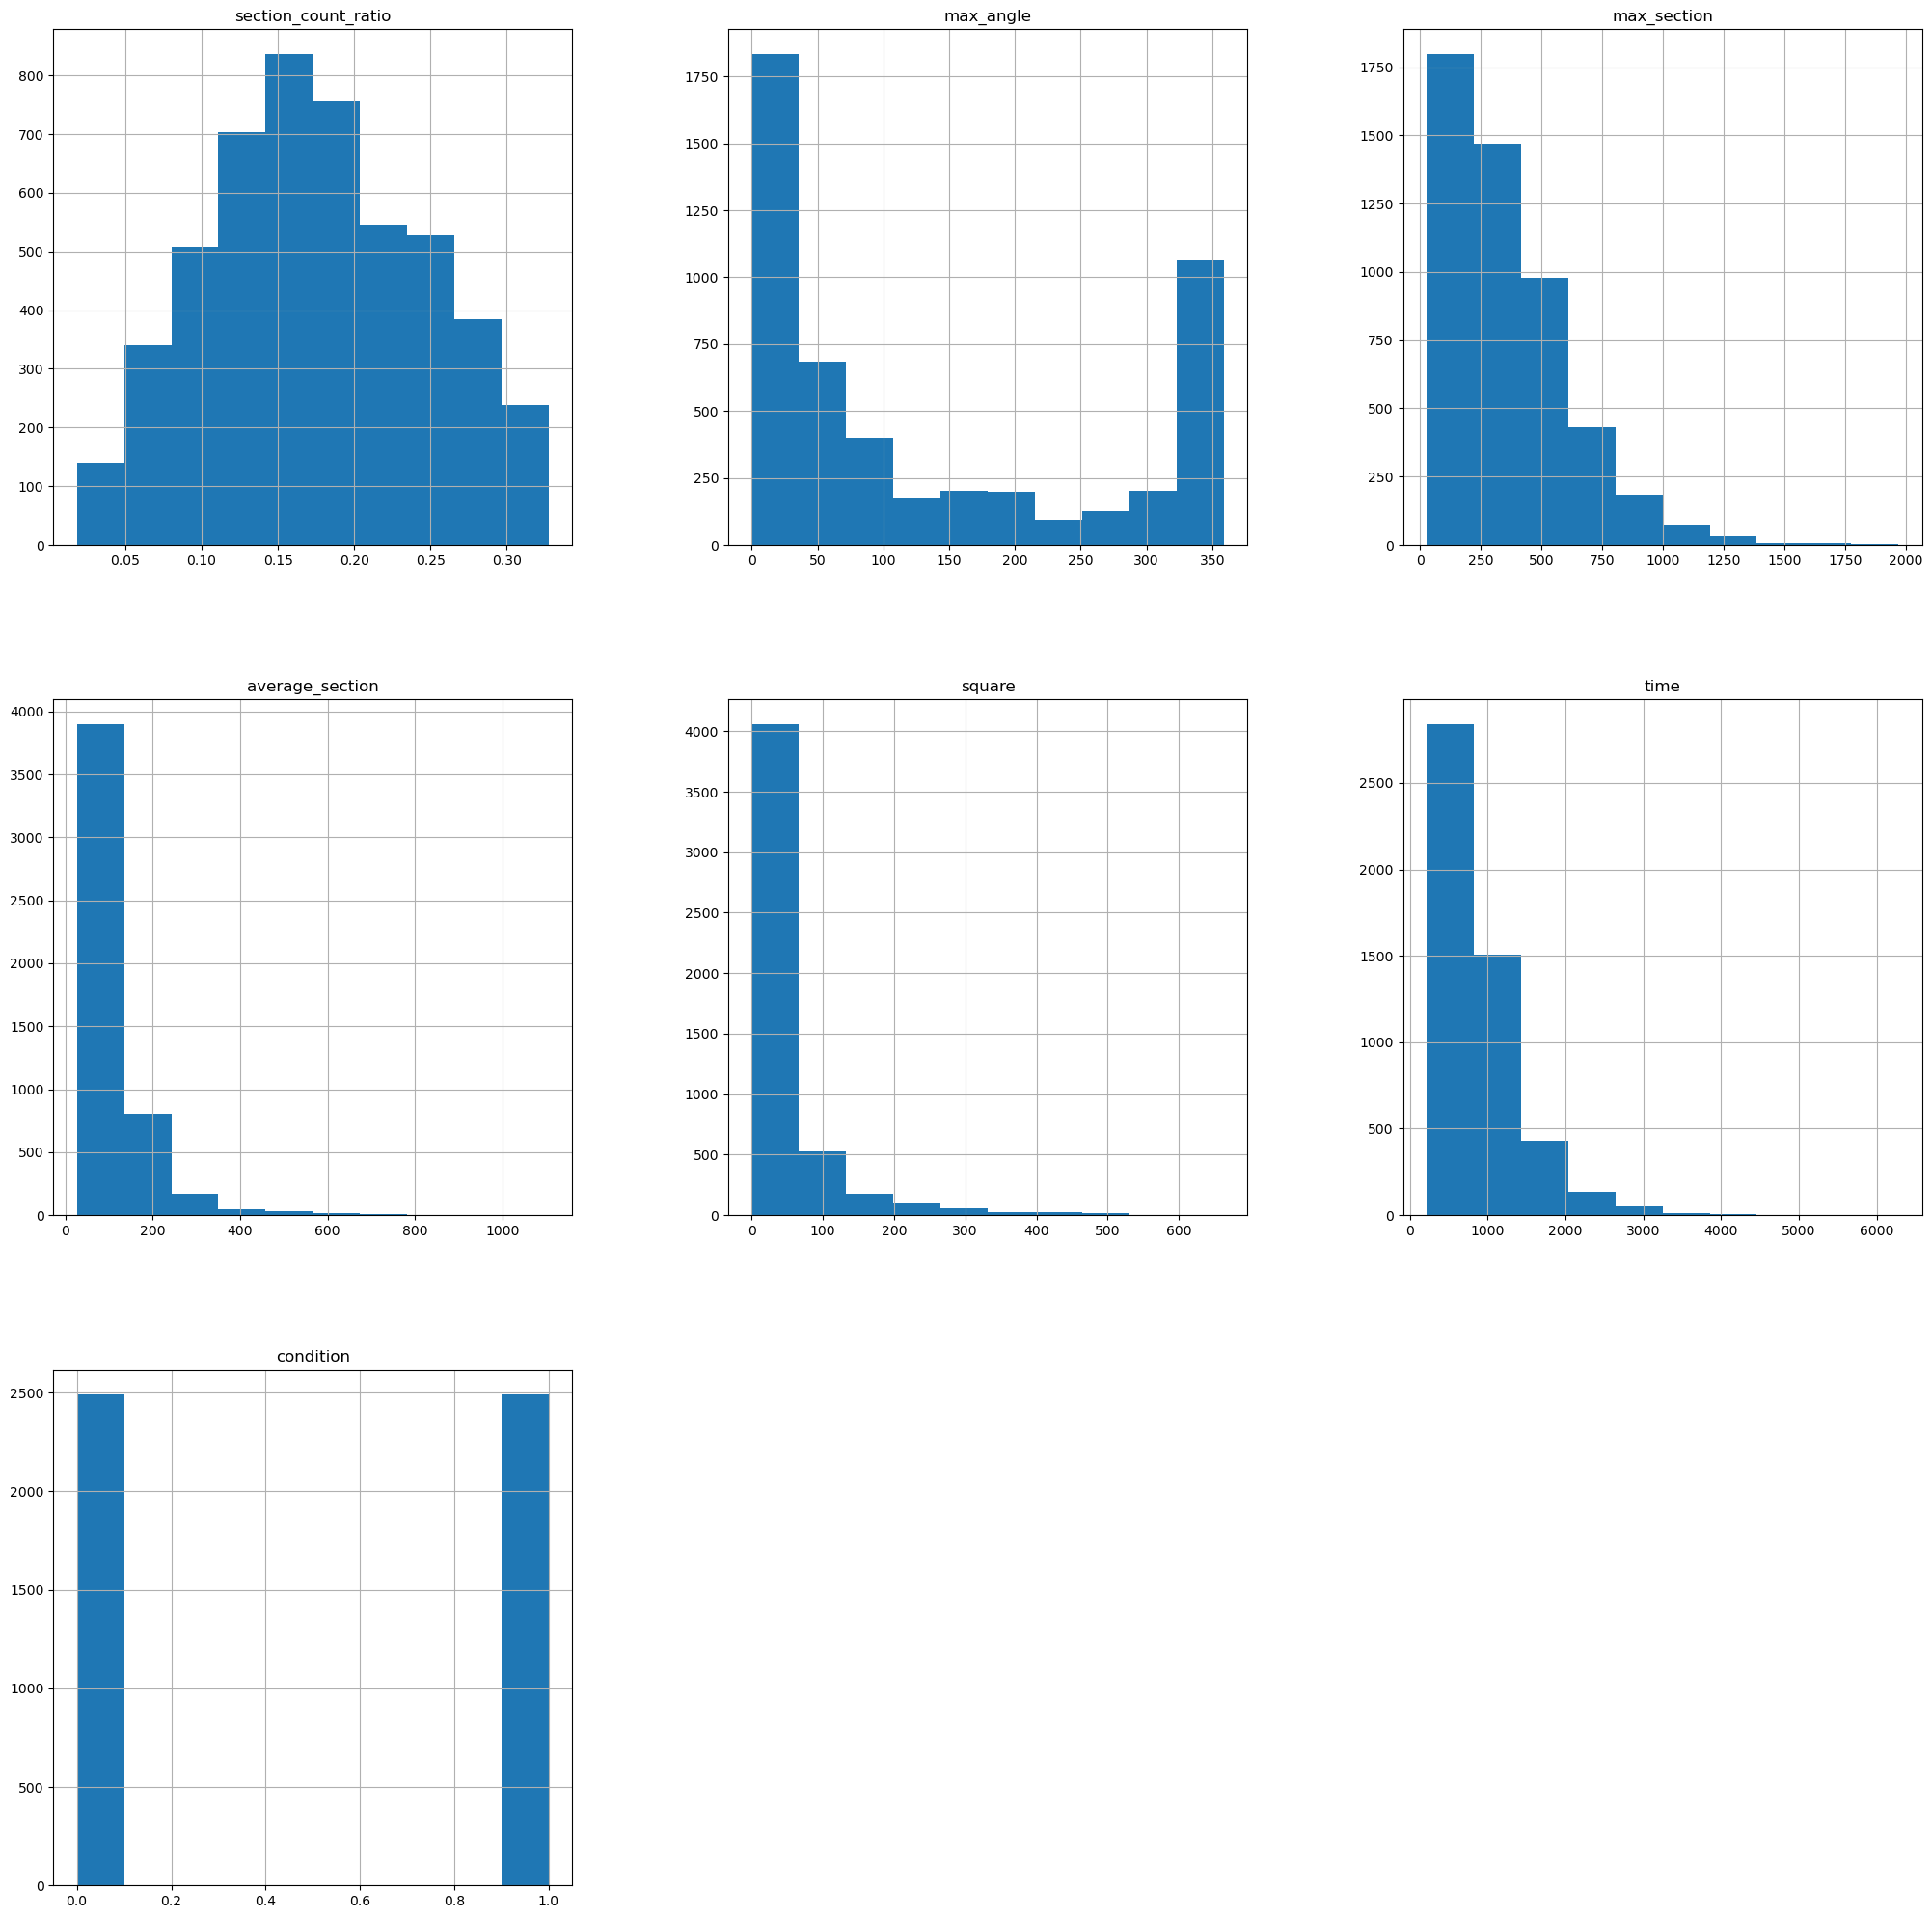

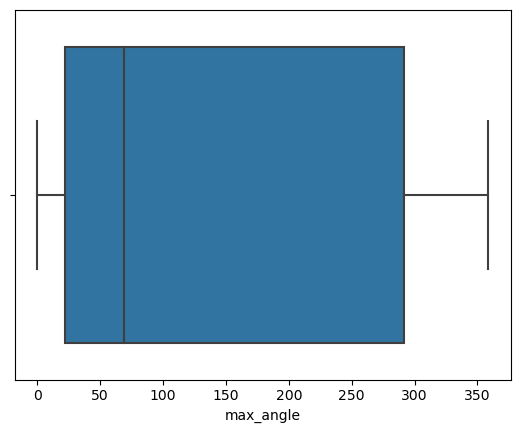

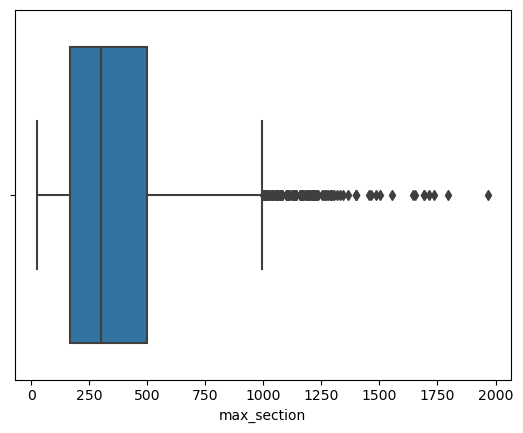

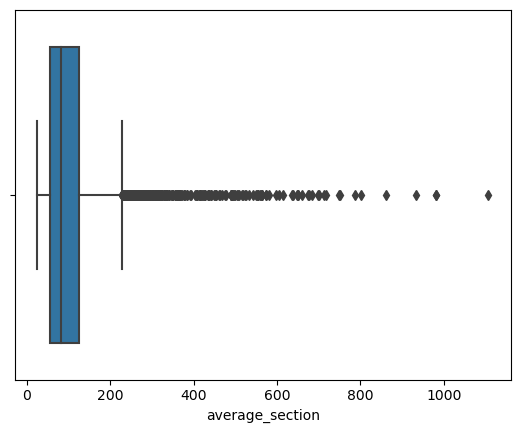

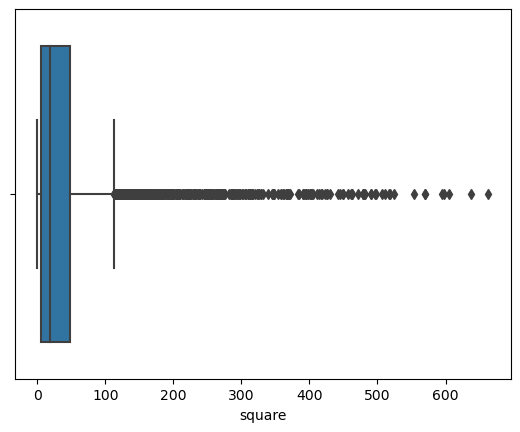

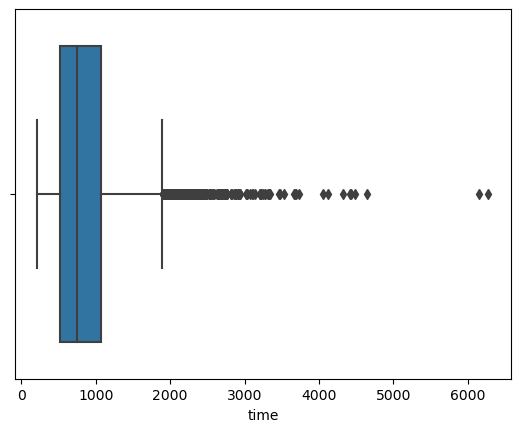

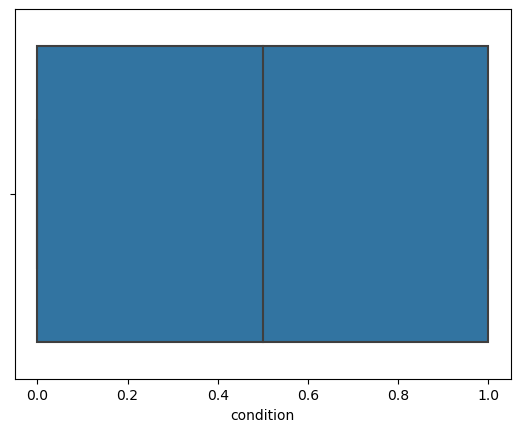

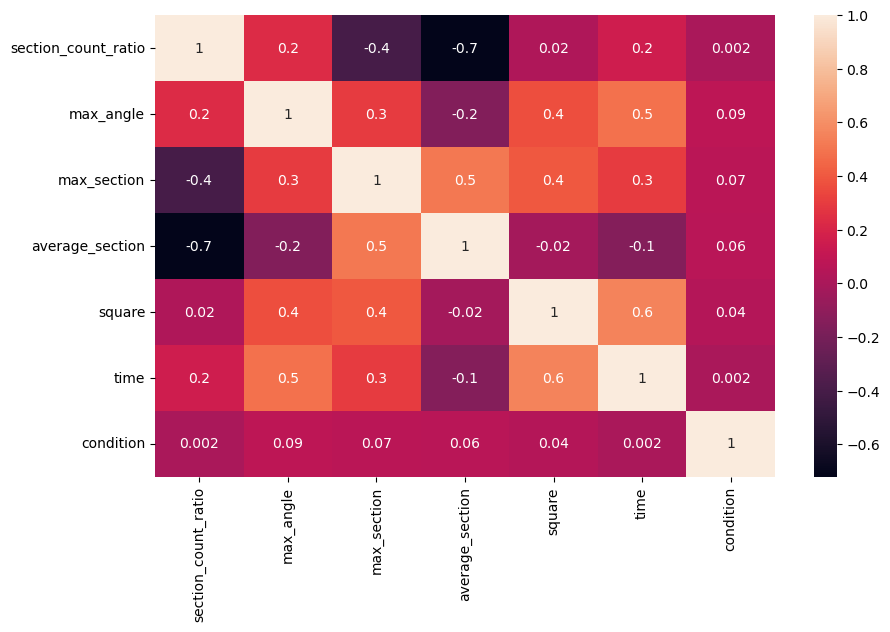

In [170]:
print_hist_boxplot_heatmap(all_data)

In [171]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(4005, 7)

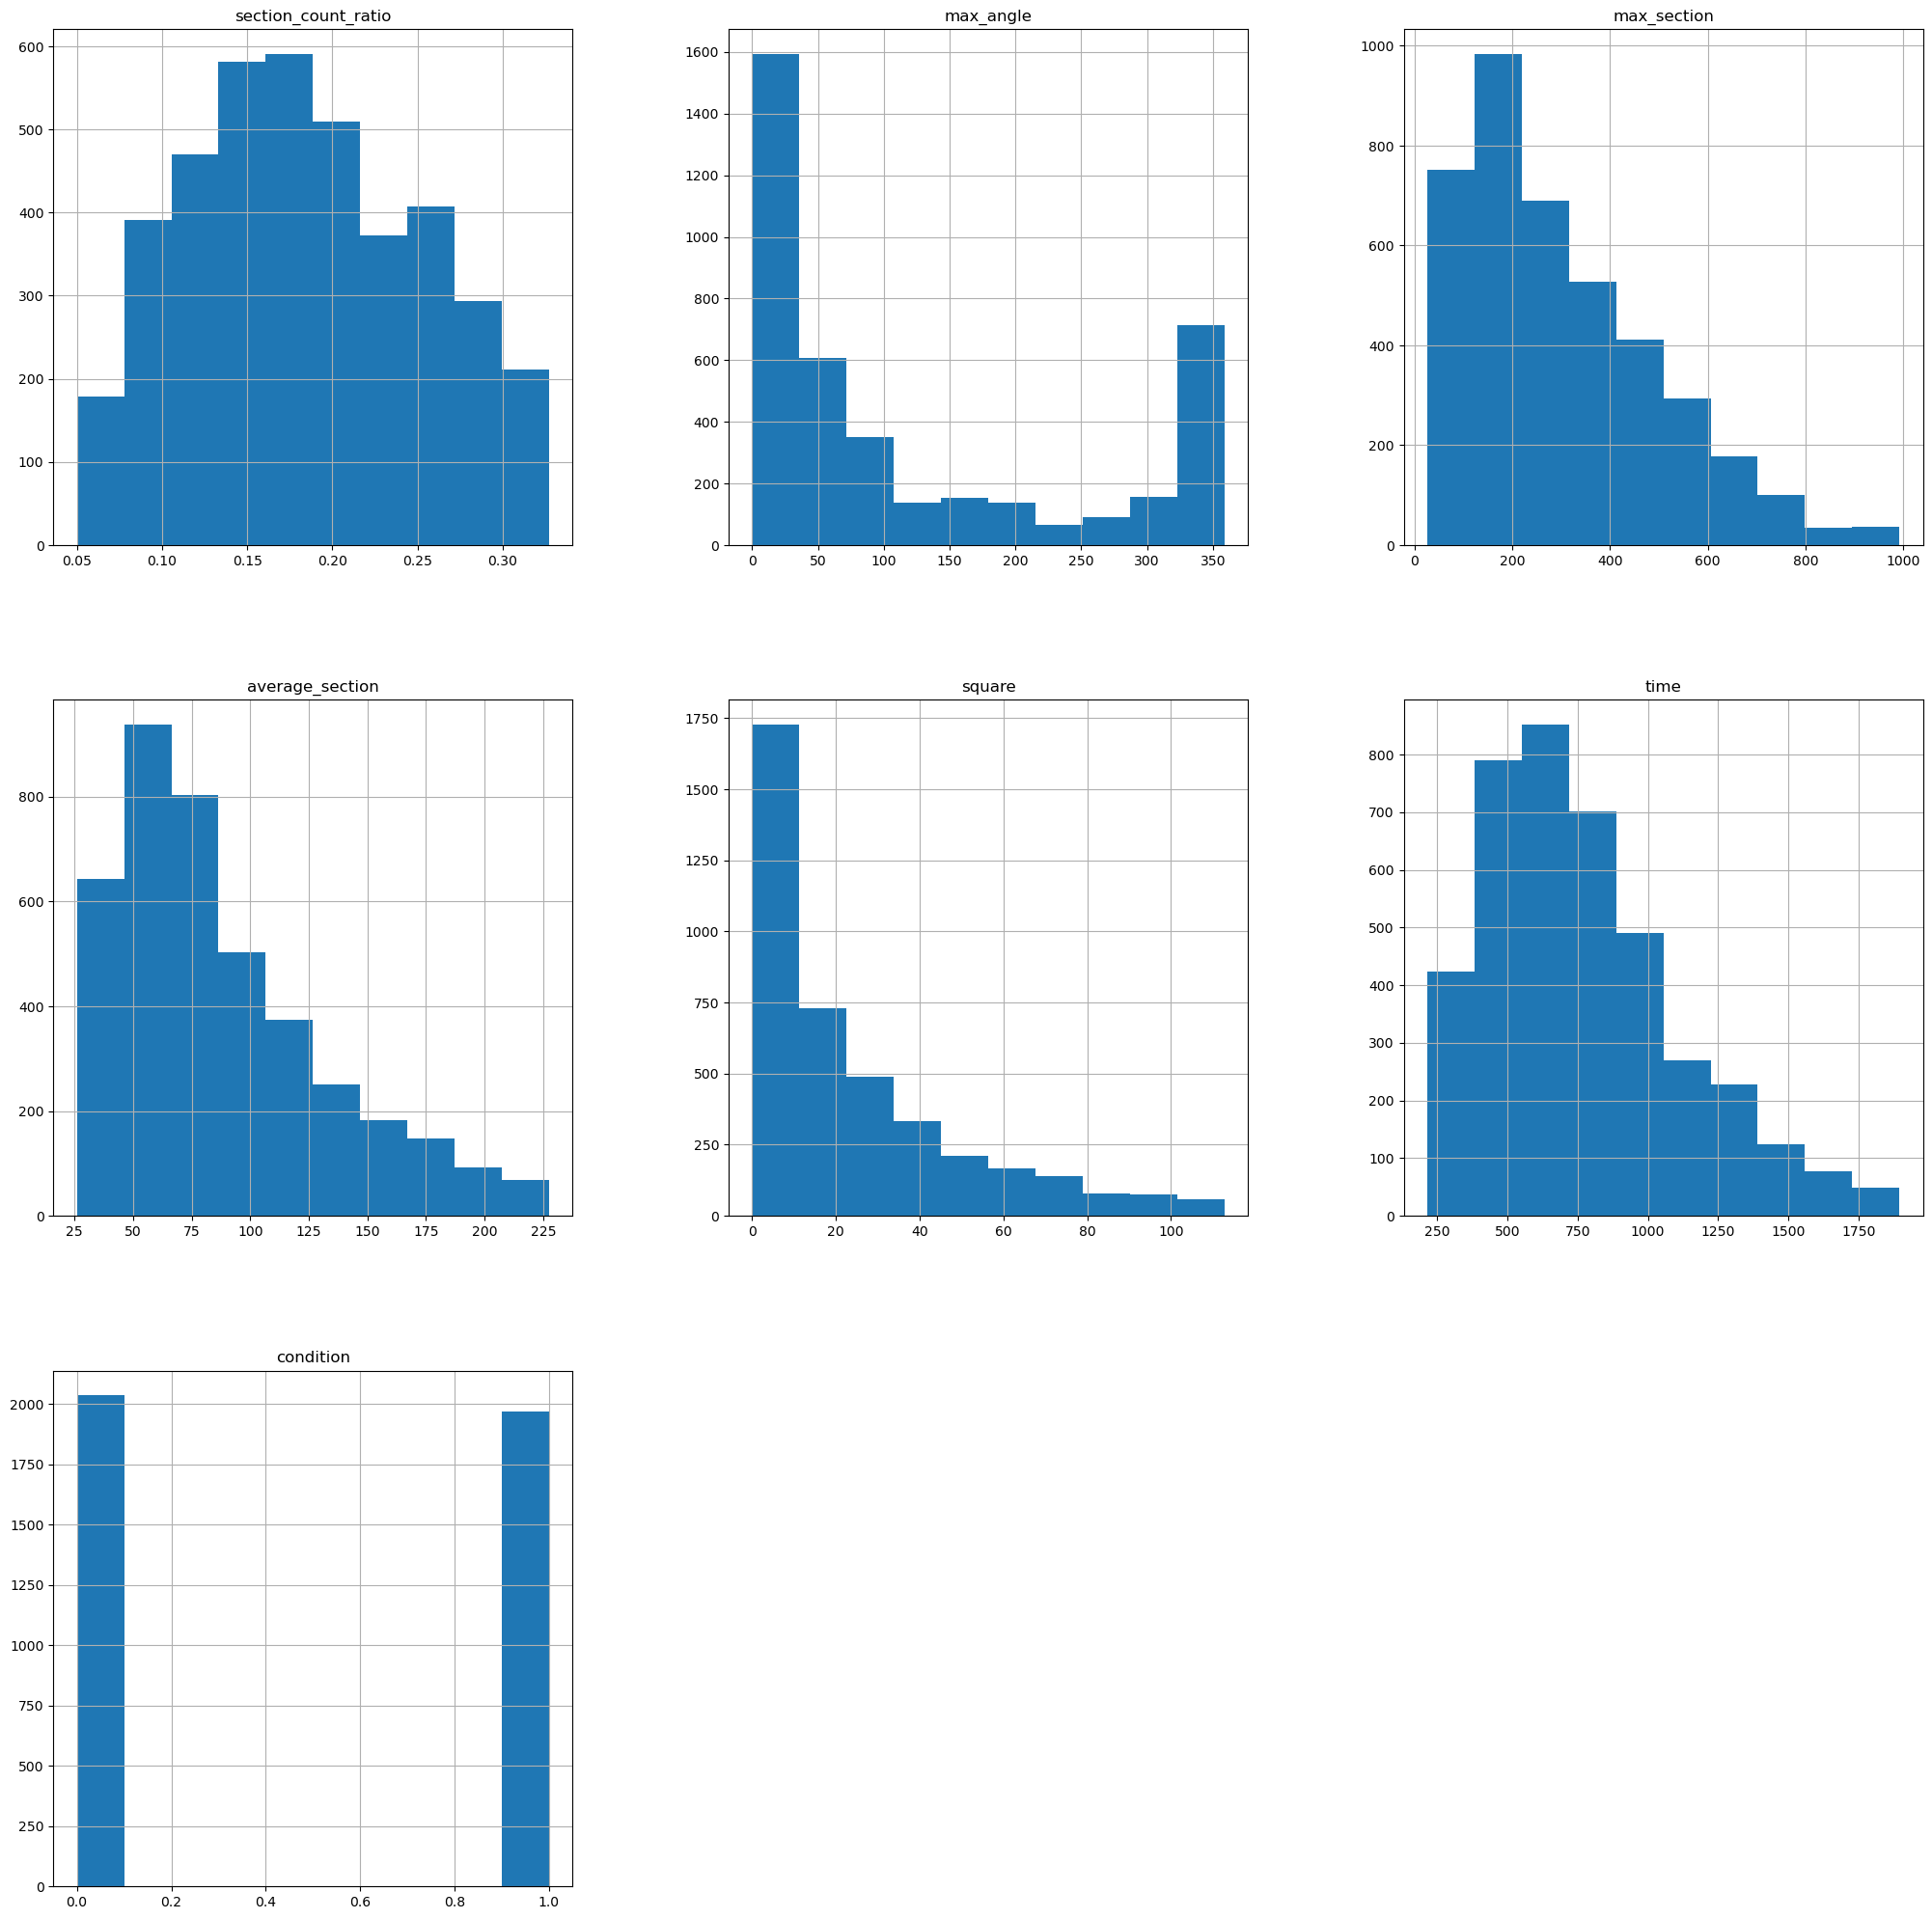

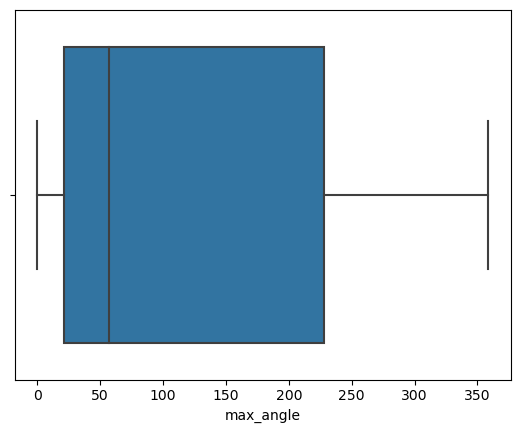

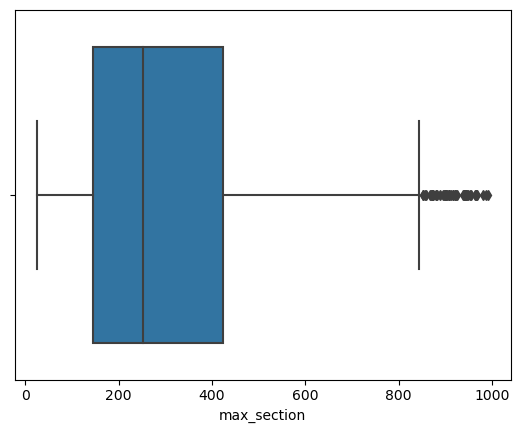

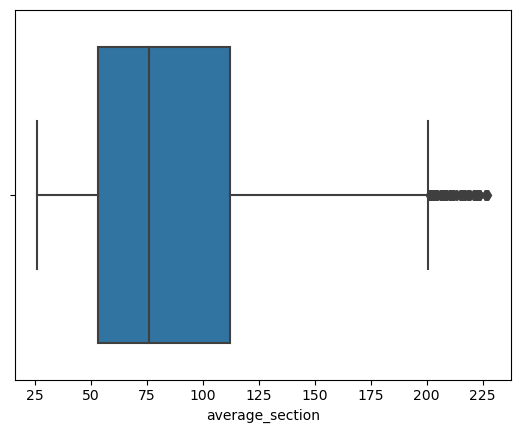

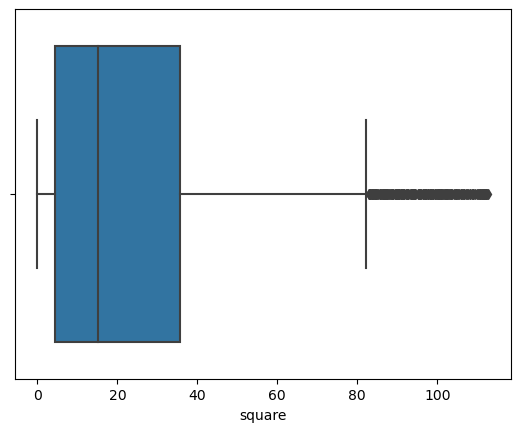

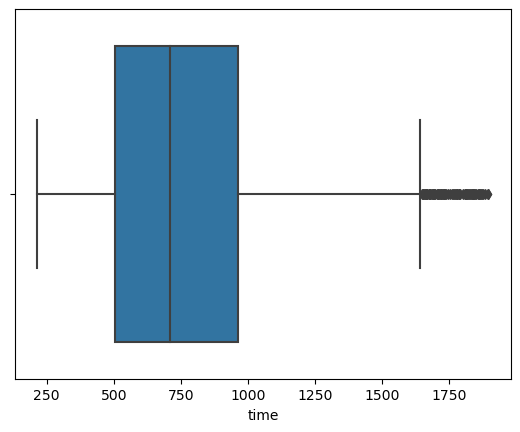

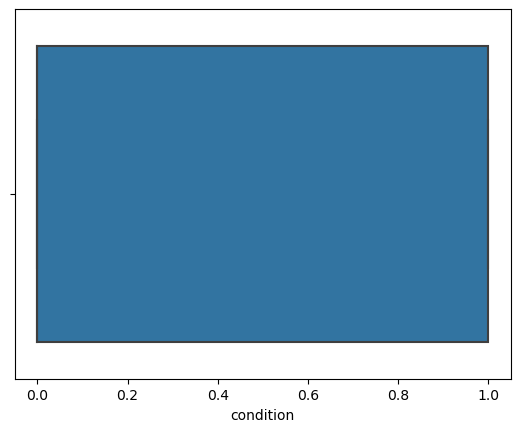

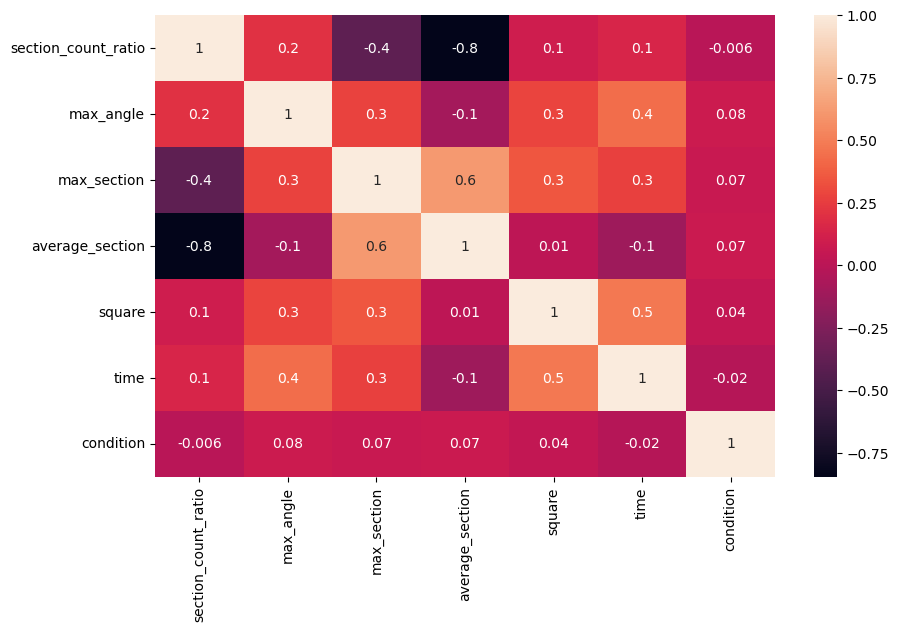

In [172]:
print_hist_boxplot_heatmap(all_data)

In [173]:
from sklearn.preprocessing import StandardScaler
scale_data = all_data.drop("condition", axis=1)
scaled_features = StandardScaler().fit_transform(scale_data.values)
scale_data = pd.DataFrame(scaled_features, index=scale_data.index, columns=scale_data.columns)

all_data = pd.concat([scale_data,all_data["condition"]], axis=1)

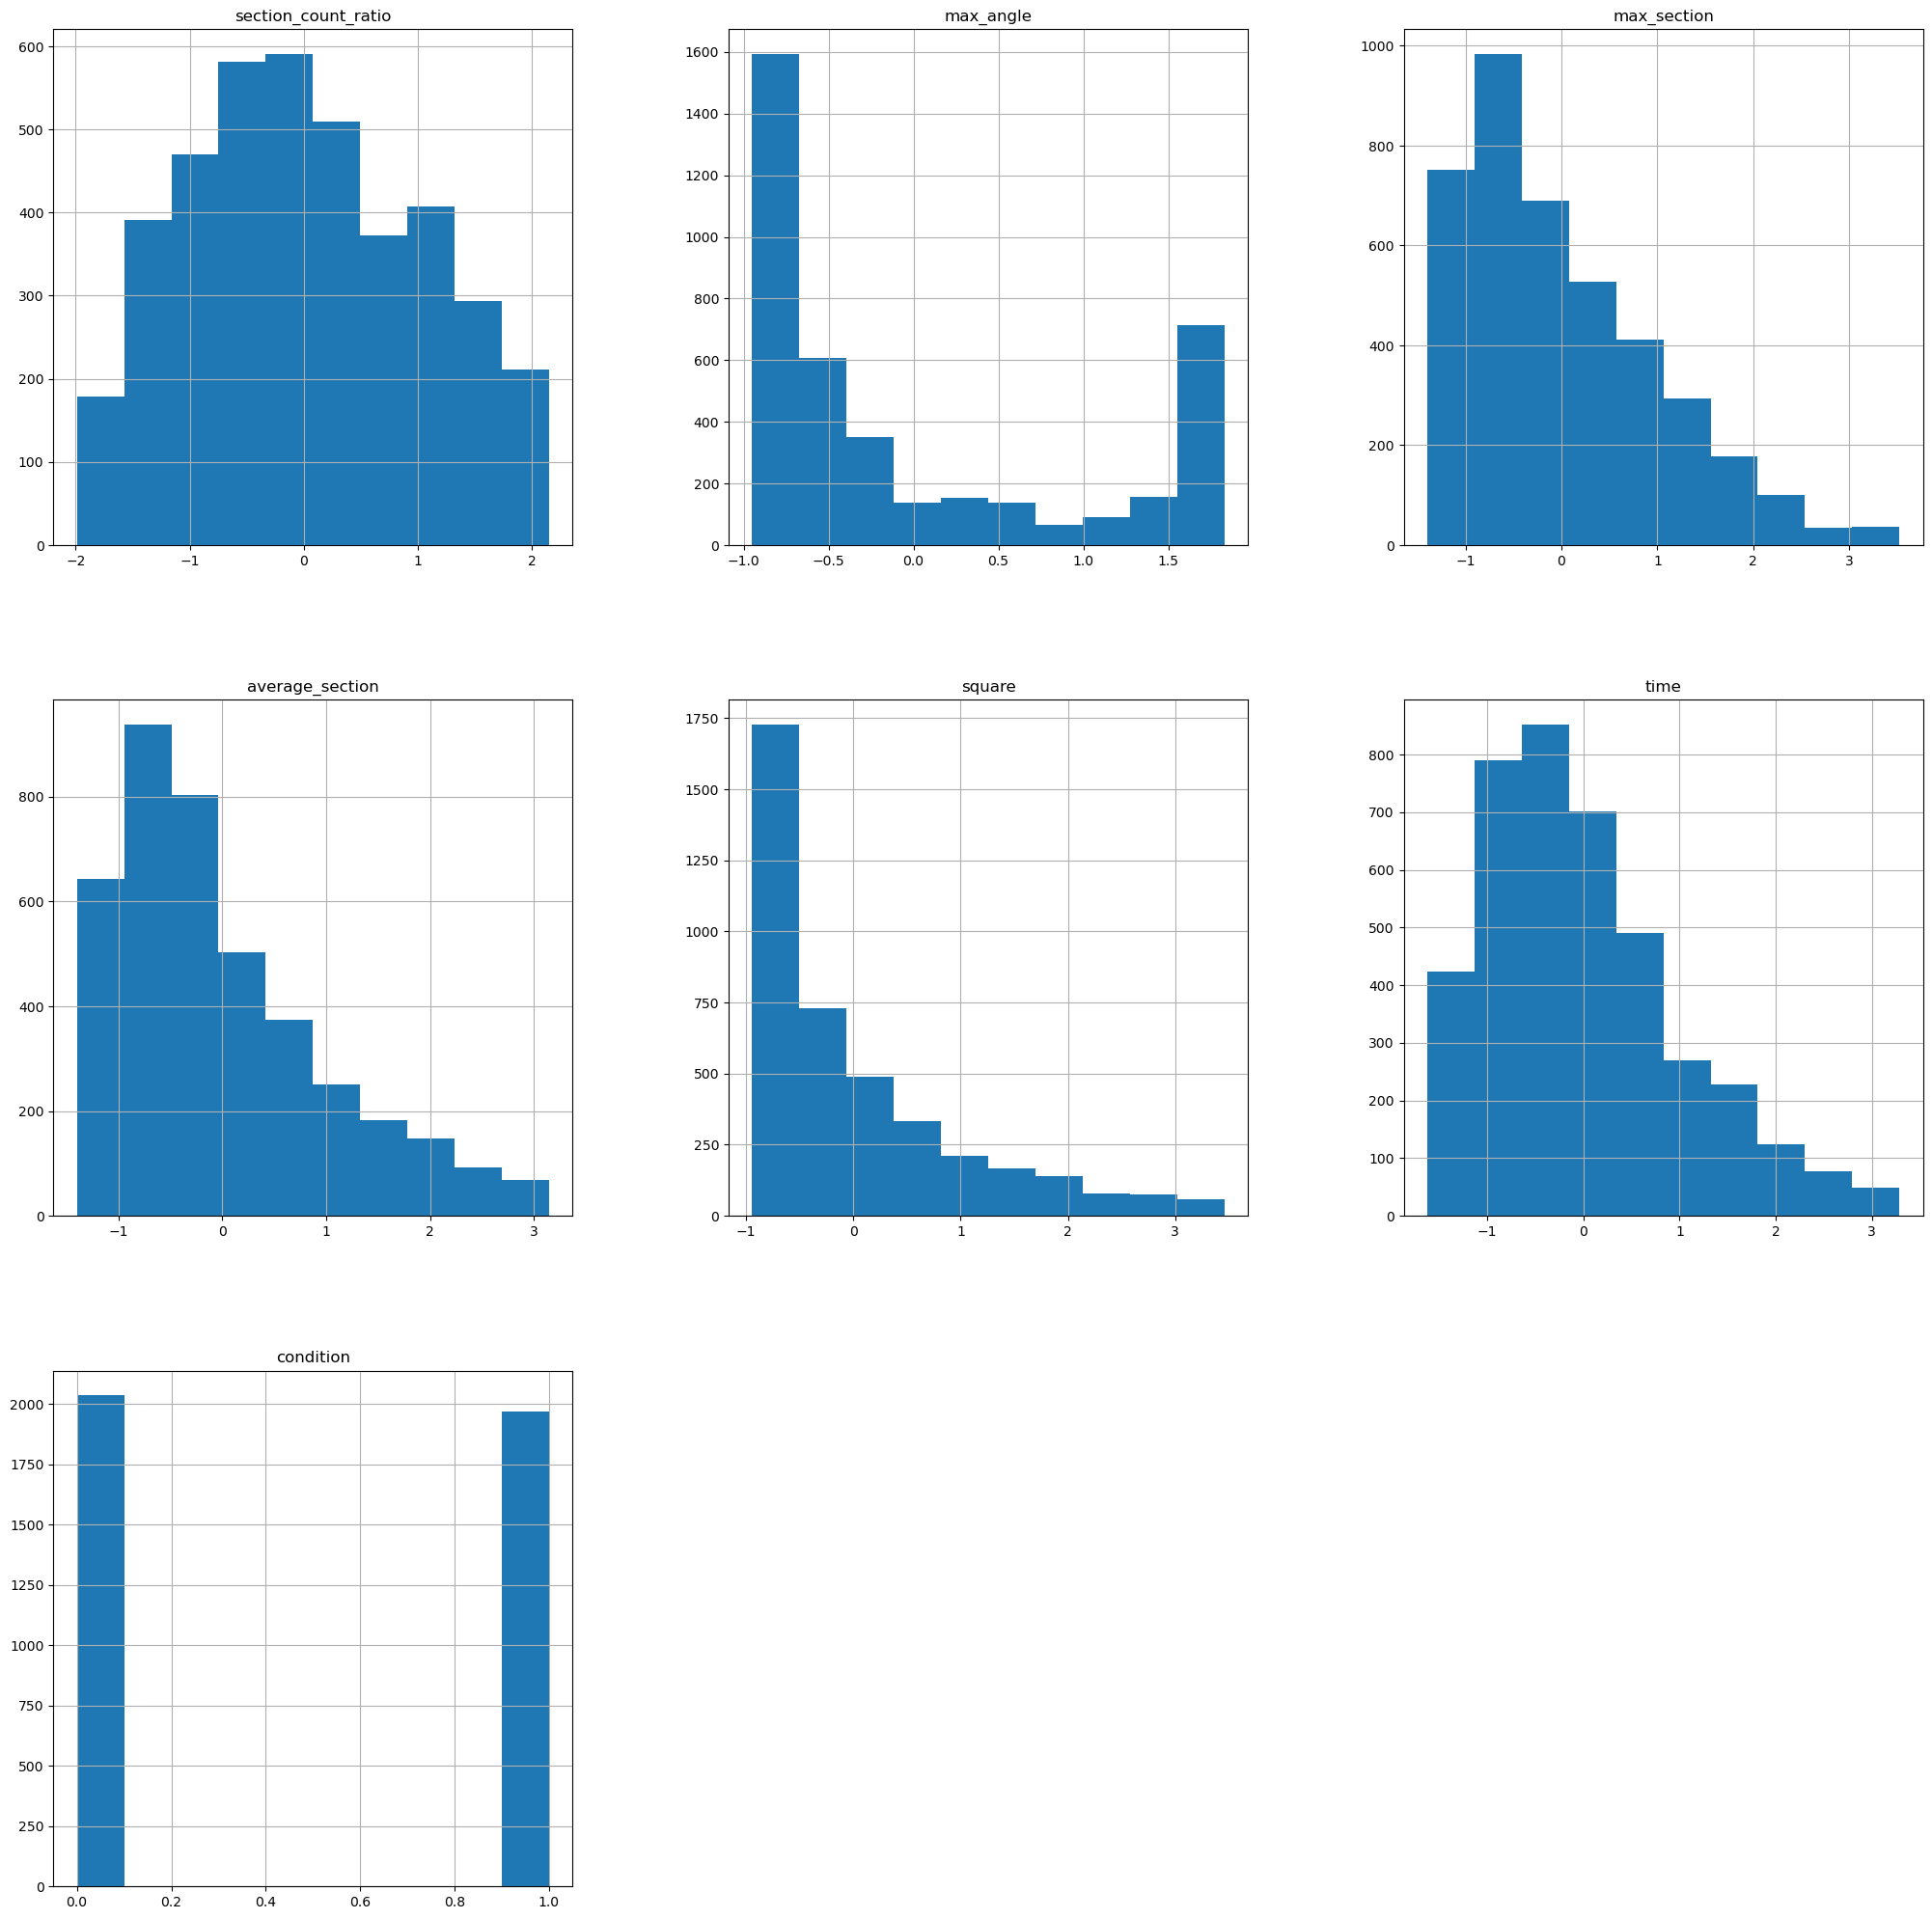

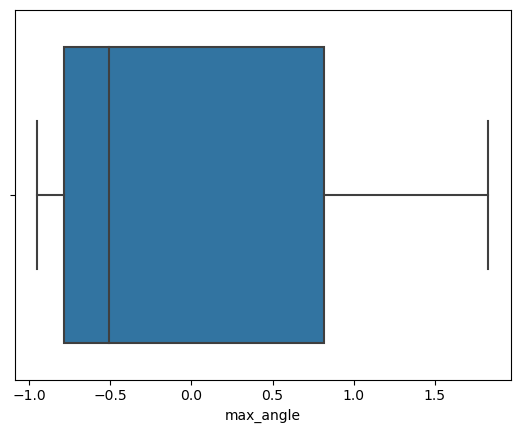

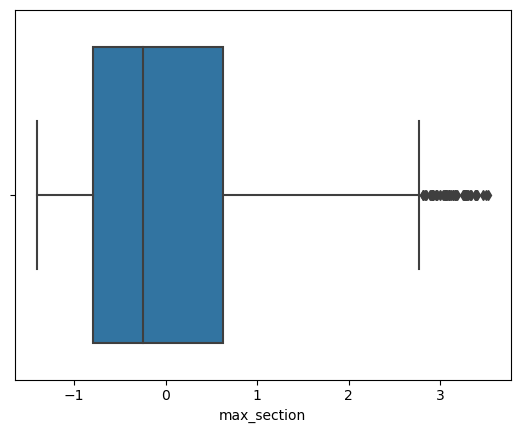

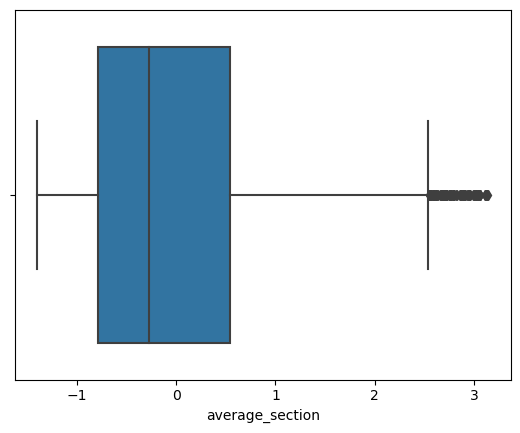

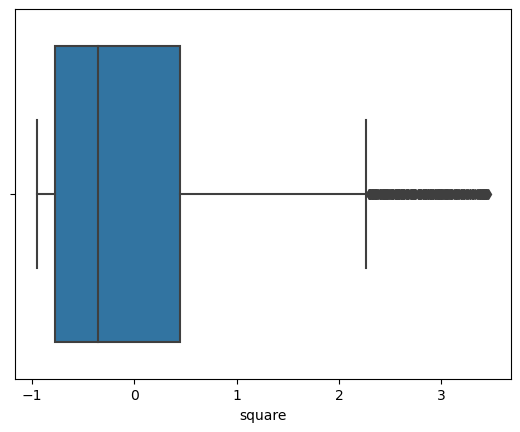

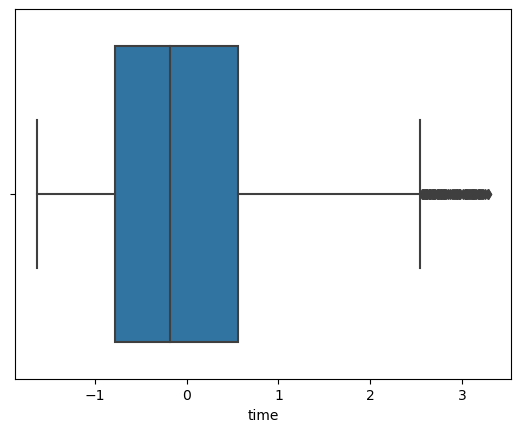

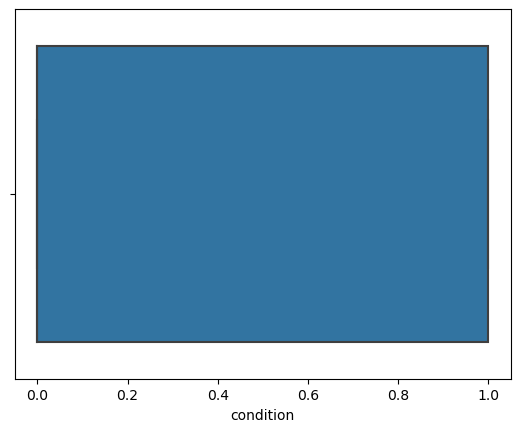

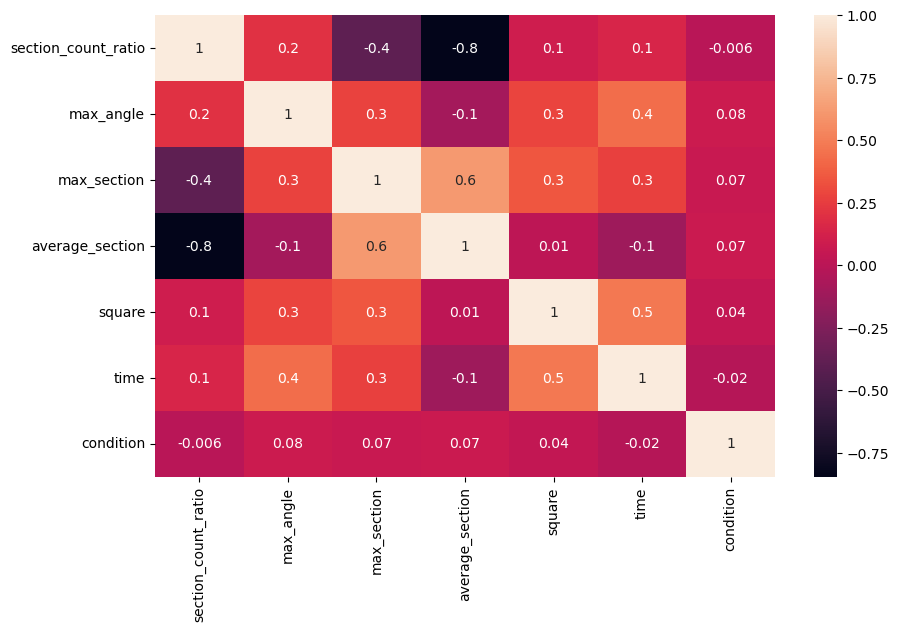

In [174]:
print_hist_boxplot_heatmap(all_data)

In [175]:
import plotly.express as px
from sklearn.decomposition import PCA

X = all_data.drop(["condition"], axis = 1)

pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

fig = px.scatter(components, x=0, y=1, color=all_data['condition'])
fig.show()

[0.37815556 0.33991266]


Обучение

In [176]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [177]:
X = all_data.drop(['condition'], axis = 1)
y = all_data.condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [178]:
X_train

,section_count_ratio,max_angle,max_section,average_section,square,time
925,0.462535,-0.869959,-1.189061,-0.684172,-0.848077,-1.026151
3330,0.062914,-0.724614,2.493662,1.184309,2.638559,-0.118897
5164,0.508868,1.800563,0.423298,-0.568894,0.260258,1.505211
2943,-0.603122,-0.949841,-1.112903,-0.130583,-0.910751,-0.540178
794,-0.603122,-0.375780,3.324080,1.073477,0.073680,-0.221979
...,...,...,...,...,...,...
5651,0.775964,0.445494,-0.826024,-0.863865,0.208565,-0.097033
4916,-1.378146,-0.702755,-0.181936,1.904342,-0.522871,-0.972610
5939,0.817754,-0.421175,0.342419,-0.736560,-0.444890,0.240560
650,-0.328114,-0.263859,0.627456,1.247421,0.019757,-0.577526


In [179]:
y_train

925     1
3330    1
5164    0
2943    0
794     1
       ..
5651    0
4916    0
5939    0
650     1
2479    1
Name: condition, Length: 3204, dtype: int64

Градиентый бустинг

In [180]:
from xgboost import XGBClassifier

In [181]:
grid_param = {'learning_rate': [0.02], 
        'min_child_weight': [1, 5],
        'max_depth': [2, 5, 10, 50],
        'n_estimators': [50, 100, 500]
        }

In [182]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.02], 'max_depth': [2, 5, 10, 50],
                         'min_child_weight': [1, 5],
                         'n_estimators': [50, 100, 500]})

In [183]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.02,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [184]:
y_pred = best_clf.predict(X_test)

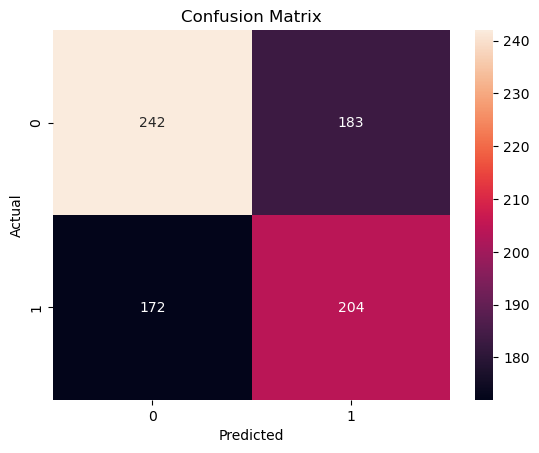

In [185]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [186]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.58      0.57      0.58       425
     class 1       0.53      0.54      0.53       376

    accuracy                           0.56       801
   macro avg       0.56      0.56      0.56       801
weighted avg       0.56      0.56      0.56       801



Случайный лес

In [187]:
grid_param = {
    'n_estimators': [50, 100, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 4)
}

In [188]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 5, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 4),
                         'n_estimators': [50, 100, 200, 400]})

In [189]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [190]:
y_pred = best_clf.predict(X_test)

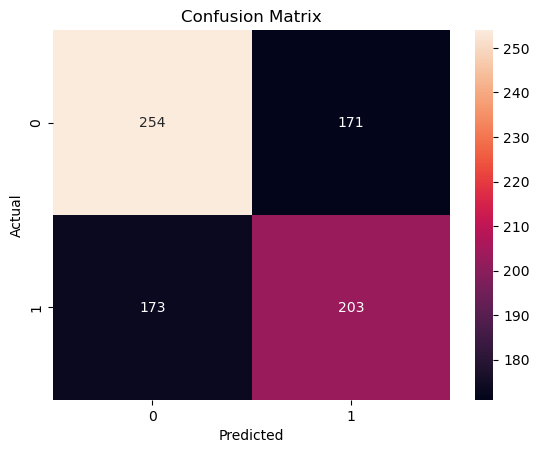

In [191]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [192]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.59      0.60      0.60       425
     class 1       0.54      0.54      0.54       376

    accuracy                           0.57       801
   macro avg       0.57      0.57      0.57       801
weighted avg       0.57      0.57      0.57       801



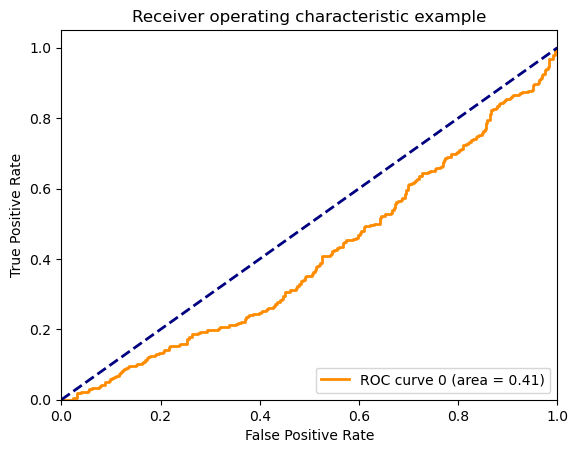

In [193]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

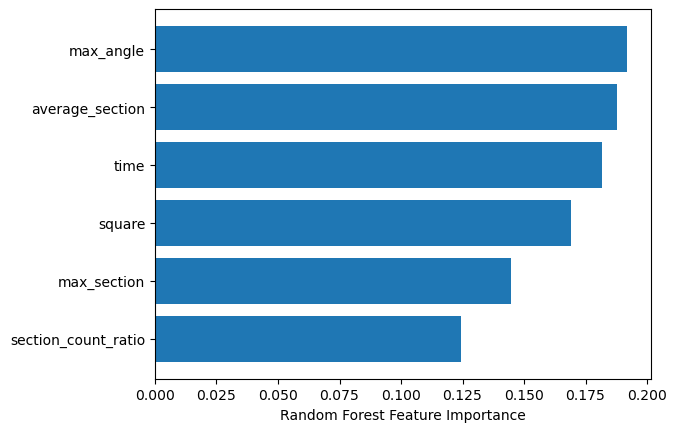

In [194]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [195]:
np.sum(best_clf.feature_importances_)

1.0

KNN

In [196]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [197]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [198]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'distance'}

In [199]:
y_pred = best_clf.predict(X_test)

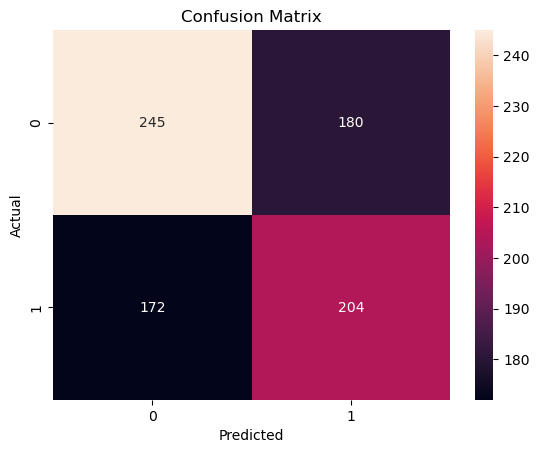

In [200]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [201]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.59      0.58      0.58       425
     class 1       0.53      0.54      0.54       376

    accuracy                           0.56       801
   macro avg       0.56      0.56      0.56       801
weighted avg       0.56      0.56      0.56       801



SVM

In [202]:
from sklearn.svm import SVC
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['rbf', 'sigmoid']}

In [203]:
svc_clas = SVC()
grid_svm = GridSearchCV(svc_clas, param_grid, refit = True, cv = 3, n_jobs = -1)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'sigmoid']})

In [204]:
best_clf = grid_svm.best_estimator_
best_clf.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [205]:
y_pred = best_clf.predict(X_test)

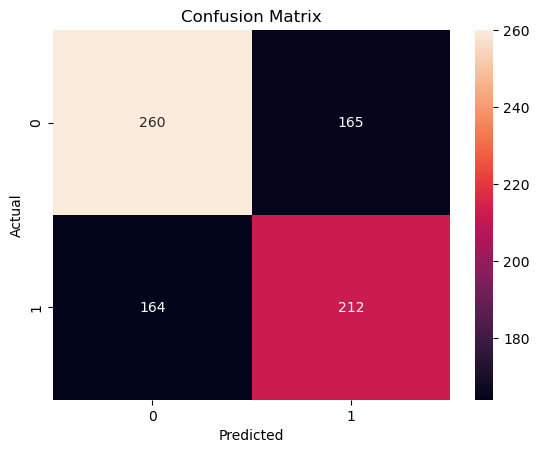

In [206]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [207]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.61      0.61      0.61       425
     class 1       0.56      0.56      0.56       376

    accuracy                           0.59       801
   macro avg       0.59      0.59      0.59       801
weighted avg       0.59      0.59      0.59       801

